## Ohad Lavie 209805787
## Ronen Hristoforov 318639028

In [342]:
#imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


## importing the data from the source

In [343]:
from ucimlrepo import fetch_ucirepo

# 1. Fetch the Adult dataset (ID=2)
adult = fetch_ucirepo(id=2)

# 2. Extract features and target
X = adult.data.features        # pandas DataFrame
y_raw = adult.data.targets         # could be a Series or 1-col DataFrame

# 3. Turn y_raw into a flat Series named “income”


if isinstance(y_raw, pd.DataFrame):
    y = y_raw.iloc[:, 0]           # grab the single column
else:
    y = pd.Series(y_raw)

y.name = 'income'

In [344]:
#concatenate X and y into a single DataFrame
df = pd.concat([X, y], axis=1)



In [345]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### we want to check if there are null values

Columns with missing values:
workclass         963
occupation        966
native-country    274
dtype: int64
----------------------
Percentage of missing values per column :
workclass         1.971664
occupation        1.977806
native-country    0.560993
dtype: float64


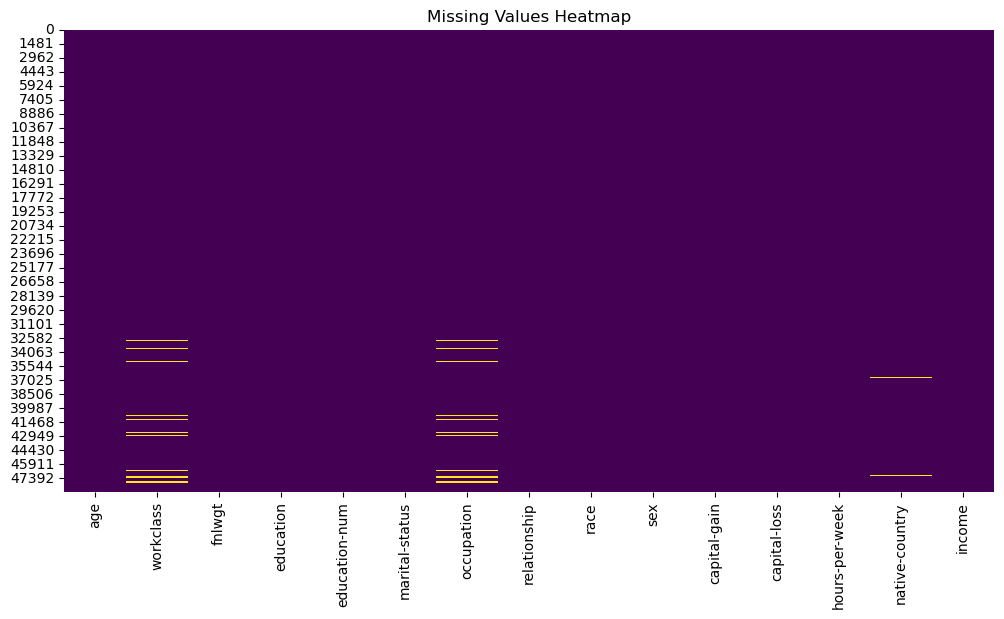

In [348]:
#print only columns with missing values
print("Columns with missing values:")
missing_columns = df.columns[df.isnull().any()]
num_missing_values = df[missing_columns].isnull().sum()
print(num_missing_values)
print("----------------------")
# to get a better understanding of what percentage of the columns are missing
missing_percentage = df[missing_columns].isnull().sum() / len(df) * 100
print(f"Percentage of missing values per column :\n{missing_percentage}")
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Based on missing values percentiles, we think that we can infer meaningful data from the missing values.
By replacing the "null" values with the string "missing" we can hopefully learn from the dataset.
We think that the missing data is refering to unoccupied people, however we're not certain, as it was not mentioned on the dataset documentation.

The missing values in the 'native country' column will be dropped as they are very scarce and we believe they dont contribute to any relevant question.

In [349]:
df['workclass'] = df['workclass'].fillna('missing')
df['occupation'] = df['occupation'].fillna('missing')
#drop the rows with missing values in the 'native-country' column
df = df.dropna(subset=['native-country'])

### verifying that the Data cleaning worked

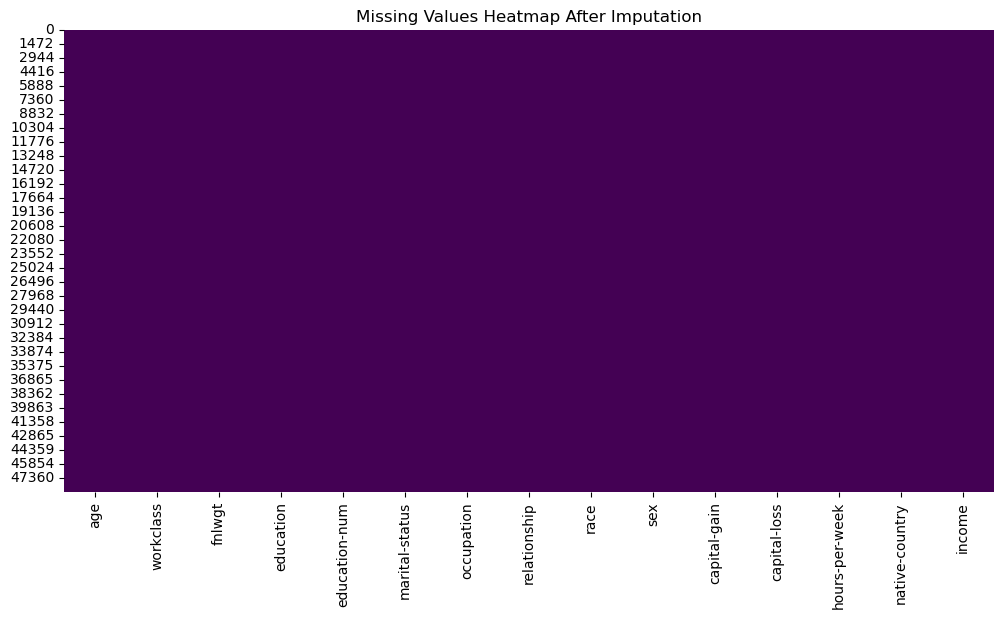

In [350]:
# checking for missing values and plotting the heatmap again
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Imputation')    
plt.show()

Unique values per column :
age                  74
workclass            10
fnlwgt            28424
education            16
education-num        16
marital-status        7
occupation           16
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64


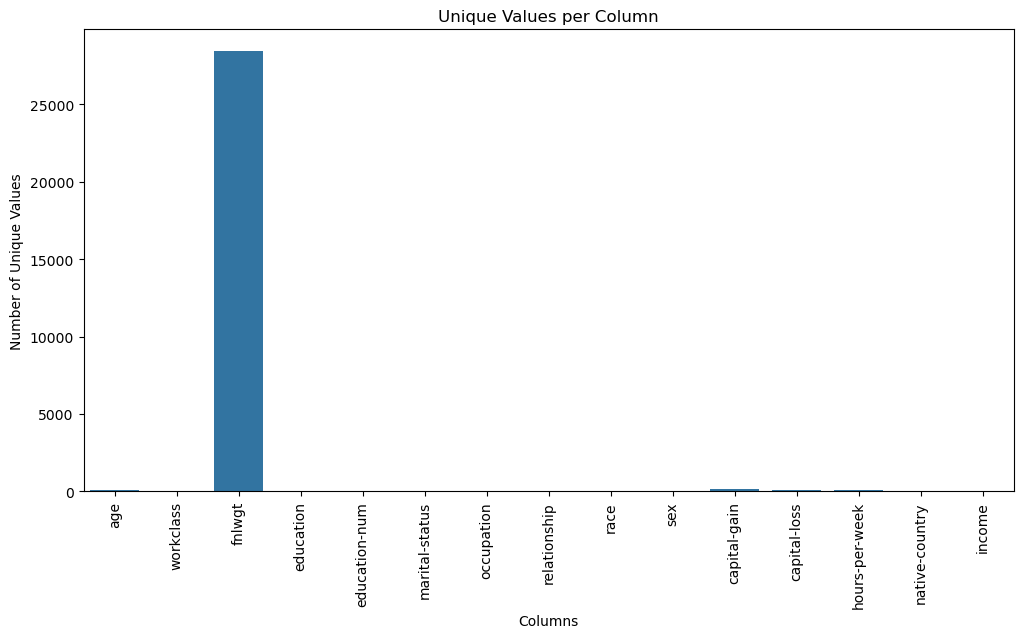

In [351]:
#we want to see how many unique values are in each column and plot them
unique_values = df.nunique()
print(f"Unique values per column :\n{unique_values}")
# Plotting the unique values
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.xticks(rotation=90)
plt.title('Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.show()

#### the column "fnlwgt" looks odd - it has 28k unique value, we assume that it can be something like  the id of each person, but then it means that there are duplicated rows

In [352]:
#lets check the odd values in fnlwgt
df['fnlwgt'].describe()


count    4.856800e+04
mean     1.896385e+05
std      1.056425e+05
min      1.228500e+04
25%      1.175085e+05
50%      1.781570e+05
75%      2.375868e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

## didnt get anything intresting --> we will drop this column as we cannot attain meaningful insights from it.


In [353]:
df.drop(columns=['fnlwgt'], inplace=True)  # dropping the fnlwgt column
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### we want to inspect the columns where we had found missing values : 'workclass' and 'occupation'.

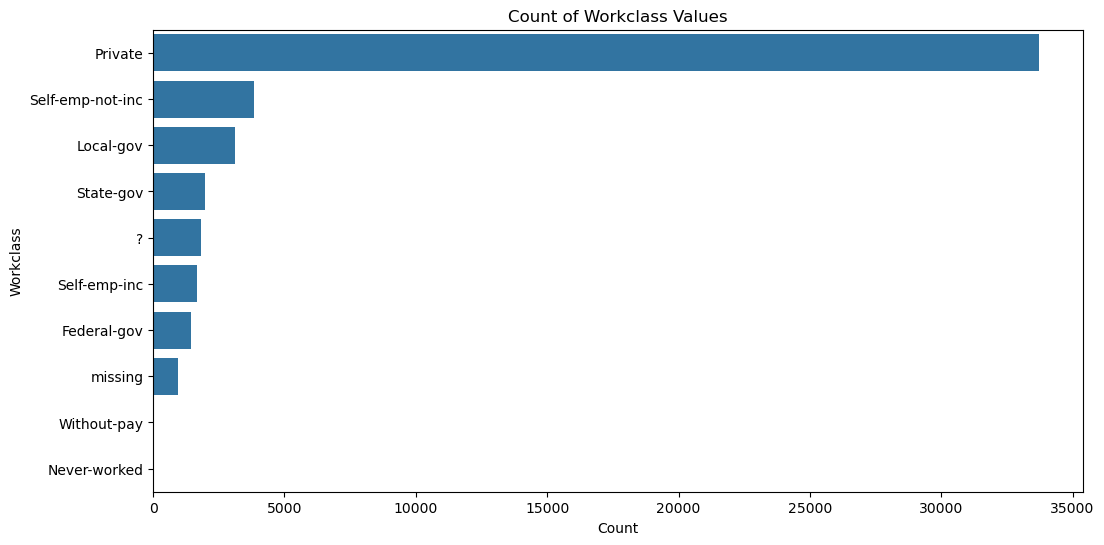

In [354]:
#lets see the values  in the 'workclass' column
df['workclass'].value_counts()
#plot the values in the 'workclass' column
plt.figure(figsize=(12, 6))
sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index)
plt.title('Count of Workclass Values')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()





### we can see that theres a unknown value '?' --> we will add this value to 'missing' value.



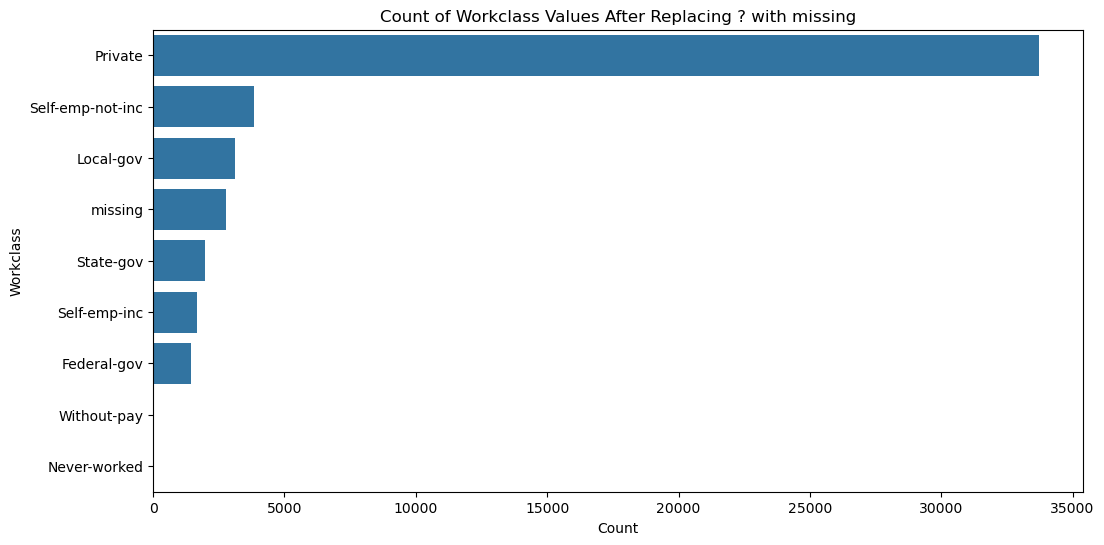

In [355]:
#adding the '?' values to the missing values
df['workclass'] = df['workclass'].replace('?', 'missing')
#plotting the values in the 'workclass' column again
plt.figure(figsize=(12, 6))
sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index)
plt.title('Count of Workclass Values After Replacing ? with missing')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

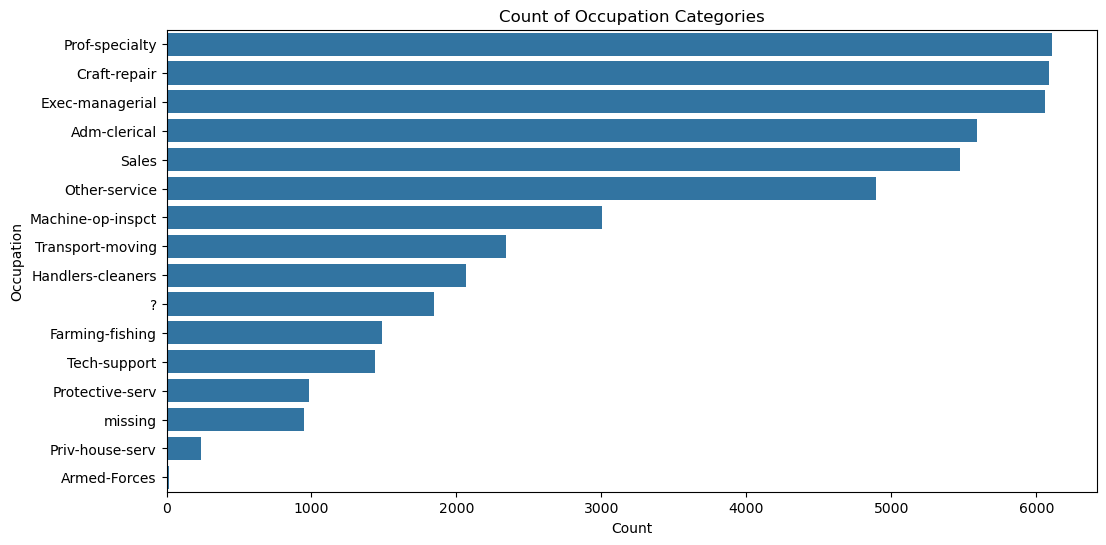

In [356]:
#chcecking if the '?' phenomenon is present in the 'occupation' column
df['occupation'].value_counts()
#plotting the values in the 'occupation' column
plt.figure(figsize=(12, 6))
sns.countplot(y='occupation', data=df, order=df['occupation'].value_counts().index)
plt.title('Count of Occupation Categories')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


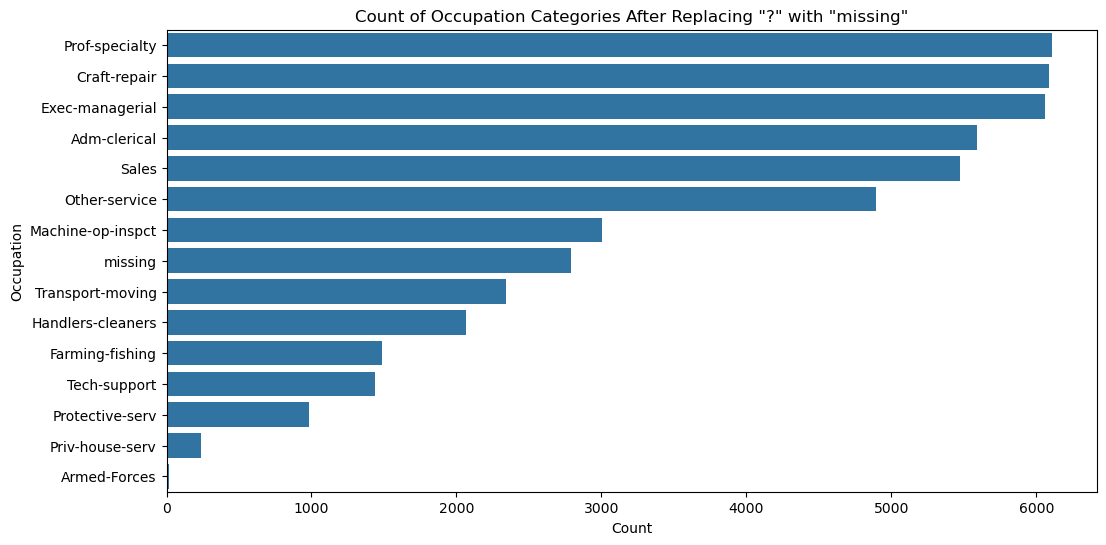

In [357]:
#adding the '?' values to the missing values
df['occupation'] = df['occupation'].replace('?', 'missing')
df['occupation'].value_counts()
#plotting the values in the 'occupation' column after replacing '?' with 'missing'
plt.figure(figsize=(12, 6))
sns.countplot(y='occupation', data=df, order=df['occupation'].value_counts().index)
plt.title('Count of Occupation Categories After Replacing "?" with "missing"')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

In [358]:
#checking if there are any '?' values in our dataframe
df[df.isin(['?']).any(axis=1)].head()



,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,missing,7th-8th,4,Married-spouse-absent,missing,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K


We can see that the '?' values are shown in the 'native-country' column, which makes sense. we will replace it with 'missing' as in the last columns we have checked, and continue to search for more '?' values in other columns

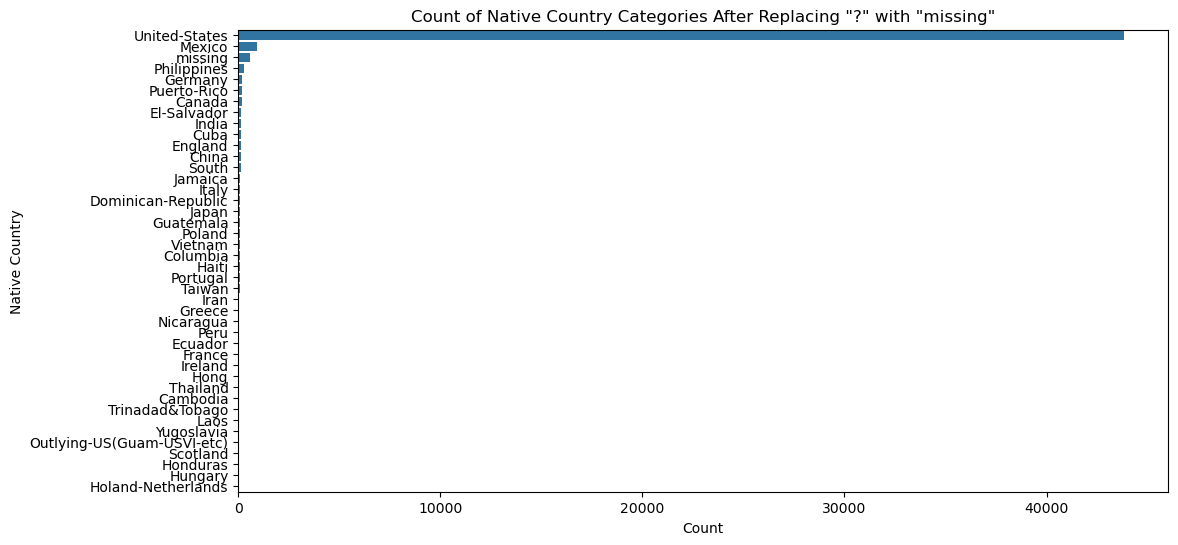

In [359]:

df.replace({'native-country': {'?': 'missing'}}, inplace=True)
#plotting the values in the 'native-country' column
plt.figure(figsize=(12, 6))
sns.countplot(y='native-country', data=df, order=df['native-country'].value_counts().index)
plt.title('Count of Native Country Categories After Replacing "?" with "missing"')
plt.xlabel('Count')
plt.ylabel('Native Country')
plt.show()


In [360]:
#chekcing if there are any '?' values in a non 'native country' column, if so we will replace them with 'missing'

# Check for '?' values in the entire DataFrame
mask = df.isin(['?'])

# Drop the 'native_country' column from the mask
mask_excl_country = mask.drop(columns=['native-country'])

# Check if any '?' values exist outside 'native_country'
has_question_marks_elsewhere = mask_excl_country.any().any()

print("Are there any '?' outside 'native-country'?", has_question_marks_elsewhere)

Are there any '?' outside 'native-country'? False


In [361]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48568.000000,48568.000000,48568.000000,48568.000000,48568.000000
mean,38.642295,10.073608,1075.908726,87.741414,40.424704
std,13.714365,2.568636,7430.021192,403.581741,12.391966
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## we can see the there are no 'anomalie' values like age > 120 or a negative capital-gain ... its a good sign that our data is clean

# Now we know that our data is clean of missing or unidentified data !

## сreating boxplots for each numeric column to identify outliers

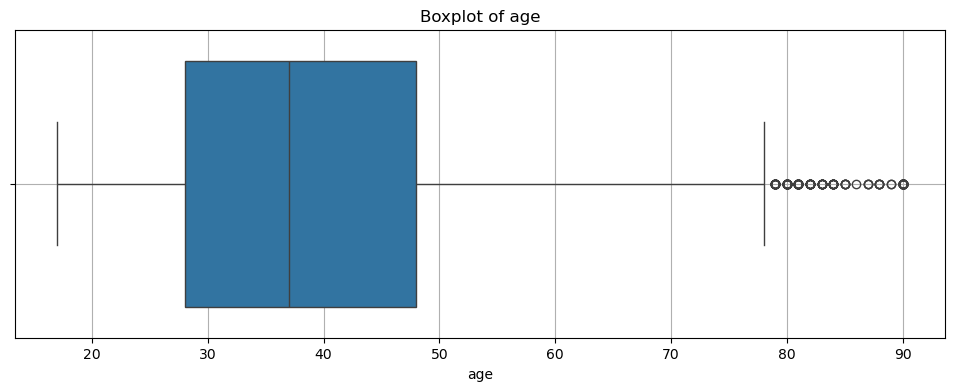

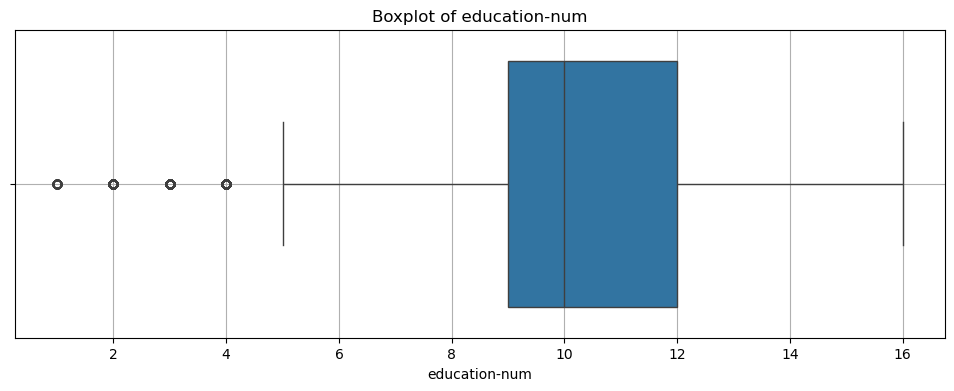

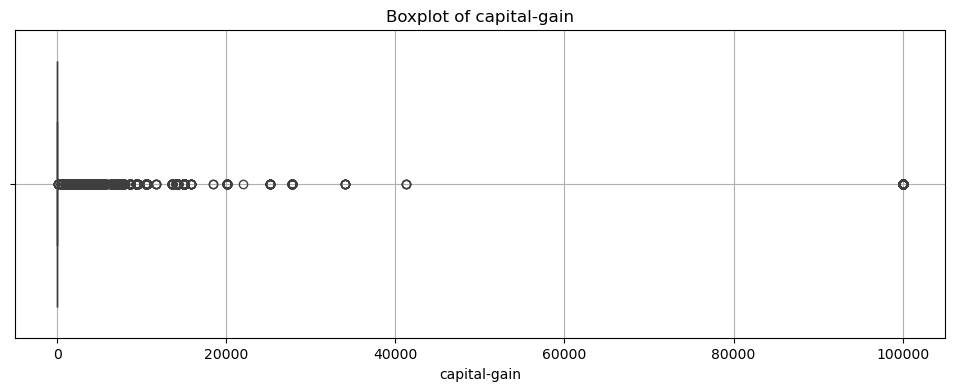

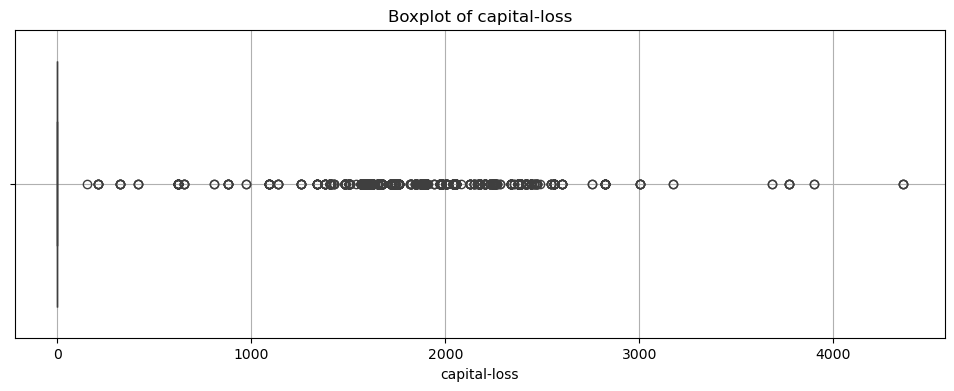

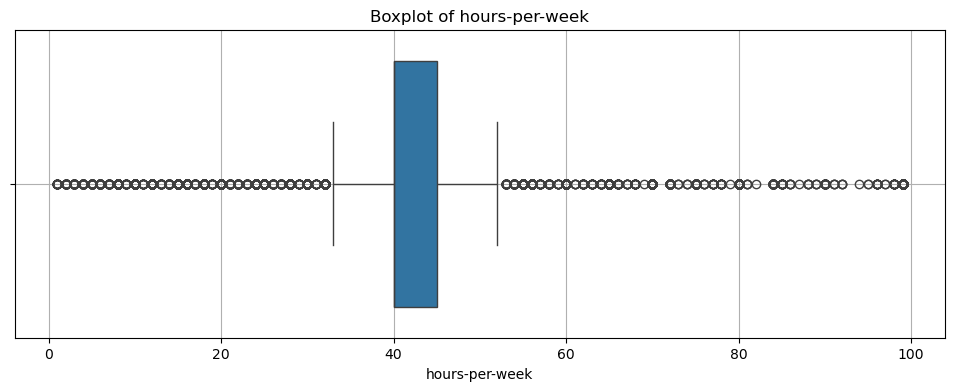

In [362]:
#сreating boxplots for each numeric column to visualize the distribution and identify outliers
#first we need to select the numeric columns as a list
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(data=df[numeric_columns], x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

# To proceed to removing outliers, analyzing distributions, we want to encode our categorical data to numeric using one-hot or label-encoding.


### There are 2 columns with education, maybe 'education-num' is the numerical column of education ?

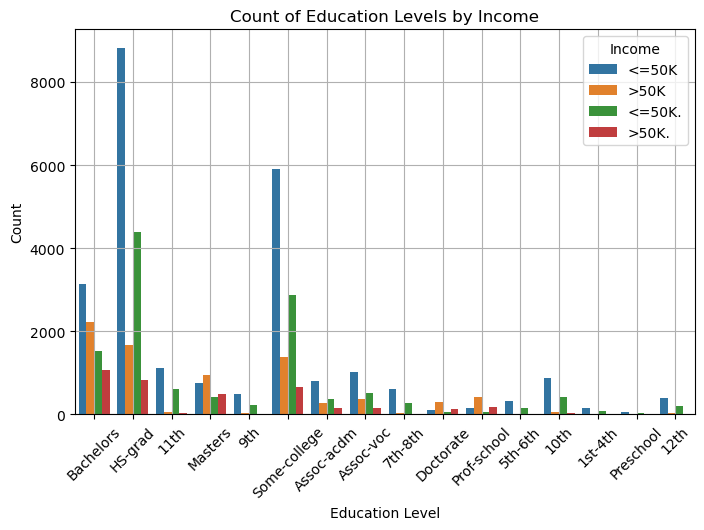

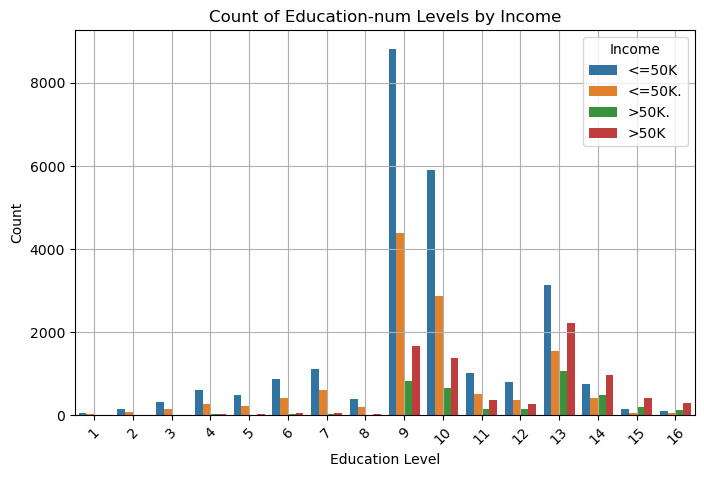

In [363]:
# we want to see if there are any correllations bwtween 'education-num' and 'education'
#lets plot the 'education' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education', hue='income')
plt.title('Count of Education Levels by Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()
#lets plot the 'education-num' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education-num', hue='income')
plt.title('Count of Education-num Levels by Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()

### There are 4 values to 'income', 2 of which are redundant --> we will unite them.

In [364]:
#lets union the '<=50k' and '<=50k.' to a one value
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
df['income'].value_counts()

income
<=50K    36955
>50K     11613
Name: count, dtype: int64

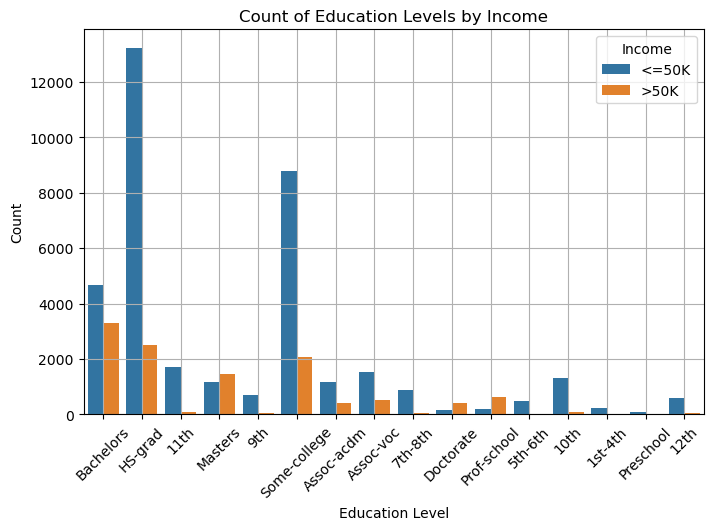

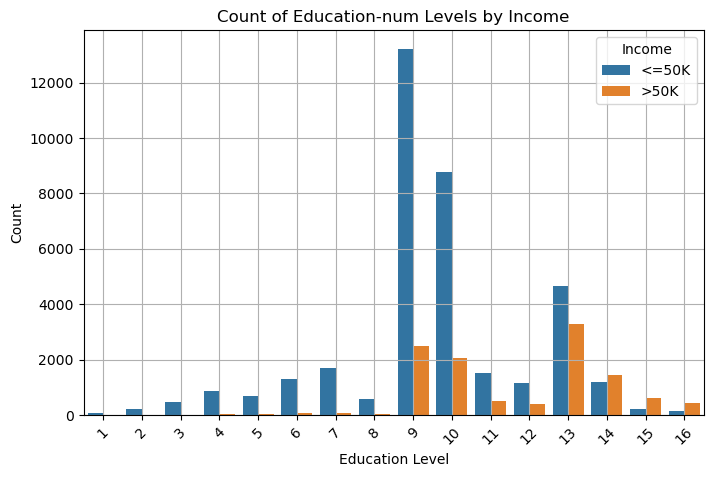

In [365]:
#lets plot the 'education' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education', hue='income')
plt.title('Count of Education Levels by Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()
#lets plot the 'education-num' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education-num', hue='income')
plt.title('Count of Education-num Levels by Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()

#### it seems as though the 2 plots are identical, however the values are placed differently. we need to figure out what values align between the 2 plots.

In [366]:
#i want to see all of the values in the 'education' column and 'eduation-num' column
print(df['education'].value_counts())
print("-------------------------------------------------")
print(df['education-num'].value_counts())

education
HS-grad         15719
Some-college    10827
Bachelors        7960
Masters          2628
Assoc-voc        2054
11th             1808
Assoc-acdm       1591
10th             1384
7th-8th           950
Prof-school       825
9th               753
12th              651
Doctorate         585
5th-6th           505
1st-4th           245
Preschool          83
Name: count, dtype: int64
-------------------------------------------------
education-num
9     15719
10    10827
13     7960
14     2628
11     2054
7      1808
12     1591
6      1384
4       950
15      825
5       753
8       651
16      585
3       505
2       245
1        83
Name: count, dtype: int64


### now we can see which integer value in 'education-num' matches the value in 'education'

In [367]:
# Pull out the unique combinations
education_pairs = (
    df[['education', 'education-num']]
      .drop_duplicates()
      .sort_values('education-num')
      .reset_index(drop=True)
)
education_pairs


,education,education-num
0,Preschool,1
1,1st-4th,2
2,5th-6th,3
3,7th-8th,4
4,9th,5
5,10th,6
6,11th,7
7,12th,8
8,HS-grad,9
9,Some-college,10


### to give us more information about the numeric values in education-num, we will create a dictionary and store the values as : {education : education-num}

In [368]:
#making a dictionary from the unique combinations
education_dict = education_pairs.set_index('education')['education-num'].to_dict()
education_dict

{'Preschool': 1,
 '1st-4th': 2,
 '5th-6th': 3,
 '7th-8th': 4,
 '9th': 5,
 '10th': 6,
 '11th': 7,
 '12th': 8,
 'HS-grad': 9,
 'Some-college': 10,
 'Assoc-voc': 11,
 'Assoc-acdm': 12,
 'Bachelors': 13,
 'Masters': 14,
 'Prof-school': 15,
 'Doctorate': 16}

In [369]:
#dropping the 'education' column from the dataframe
df.drop(columns=['education'], inplace=True)
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [370]:
# select the categorical columns as a list
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
# analyzing which categorical column we can one-hot encode and which we can label encode
print(categorical_columns)

['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


## Analyzing the categorical columns before we encode them => Plots!

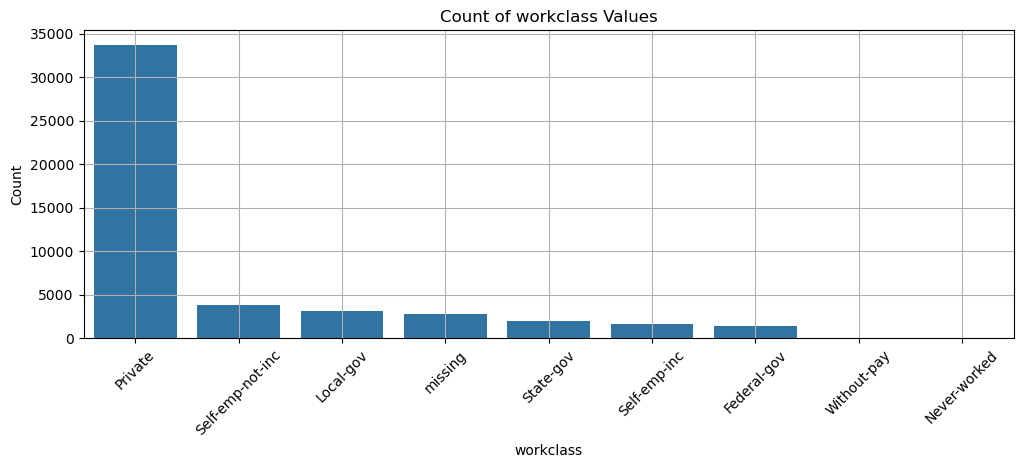

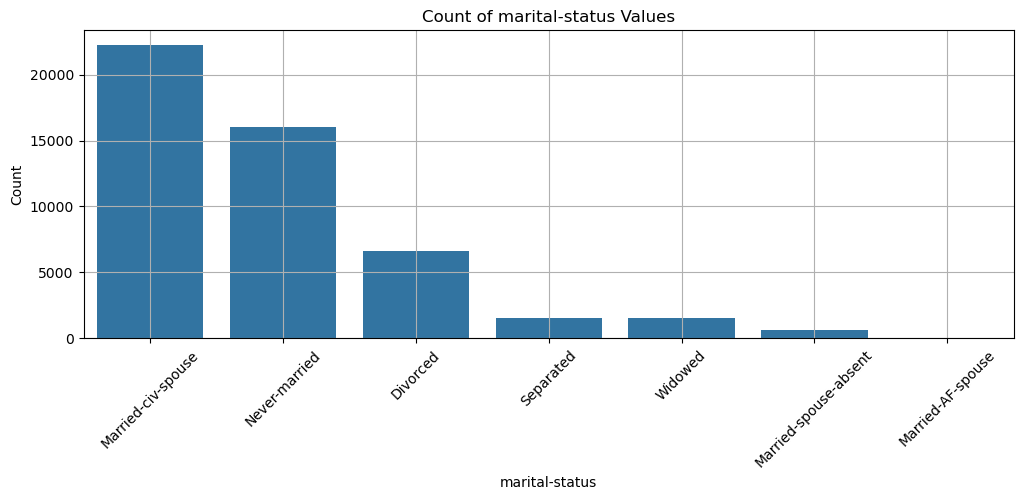

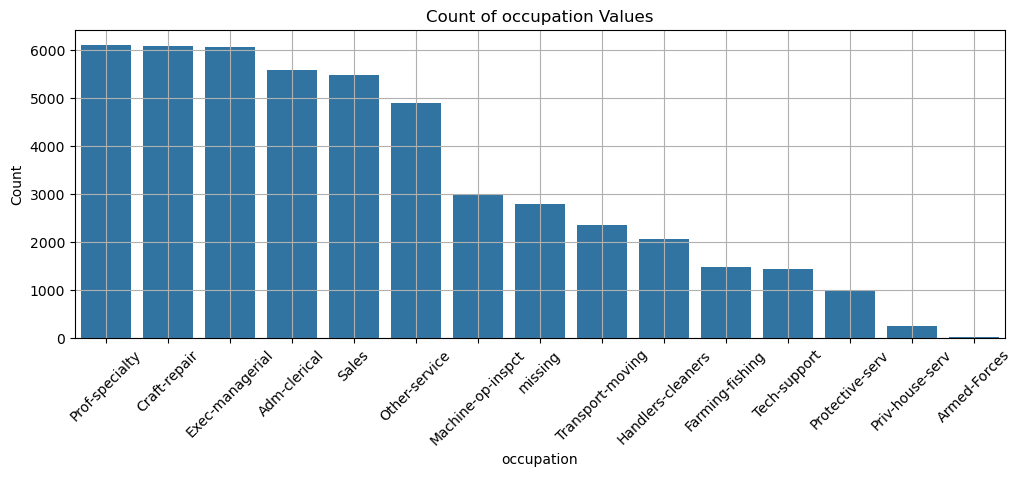

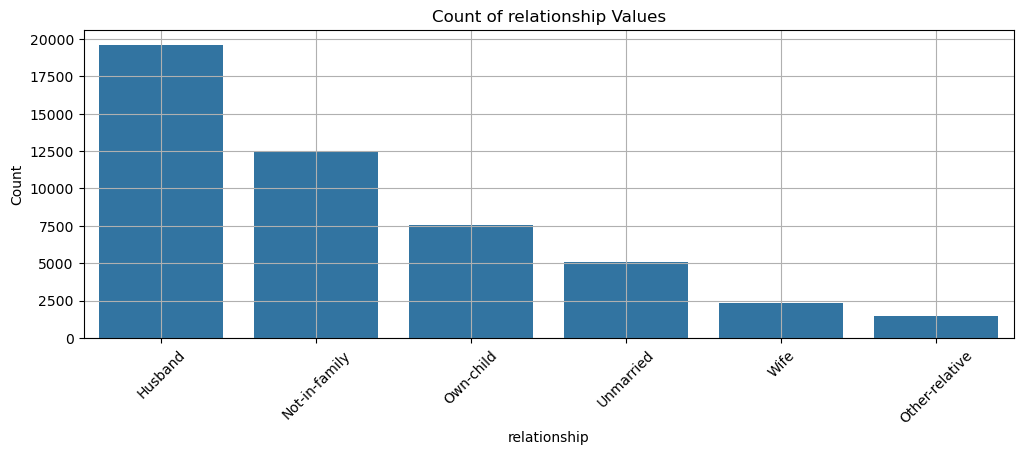

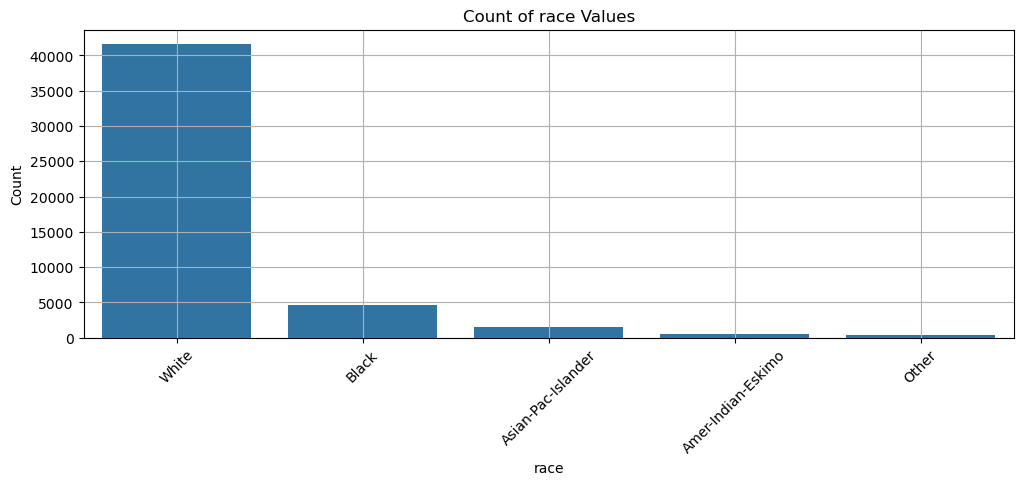

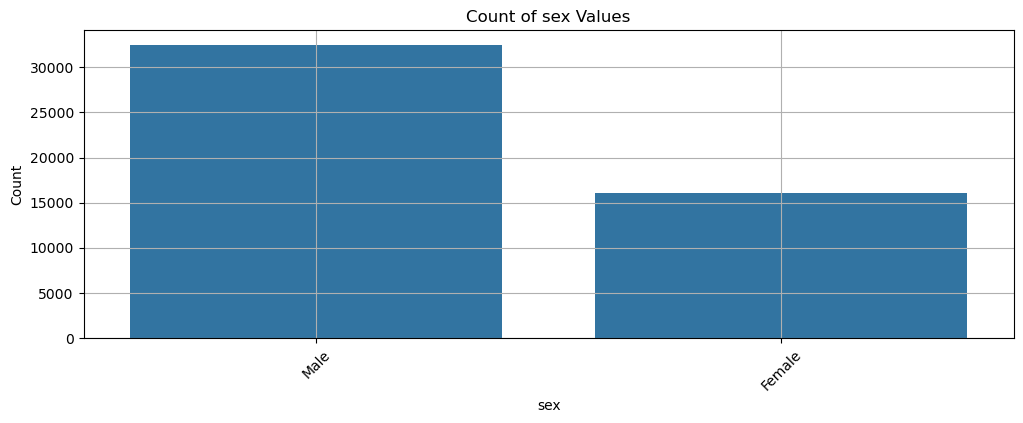

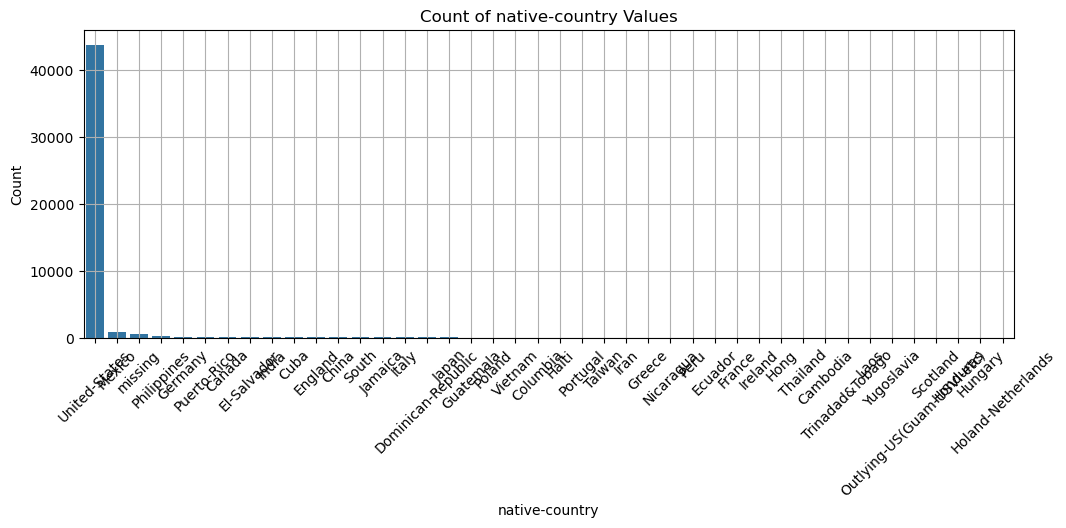

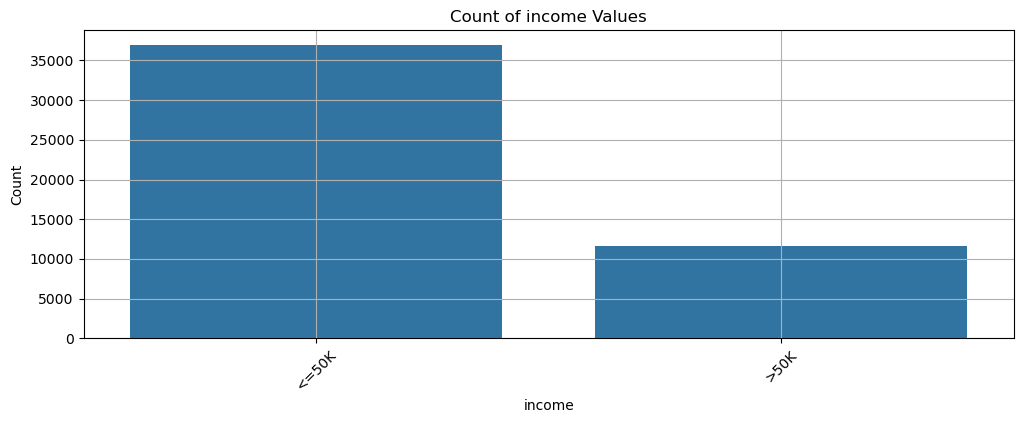

In [371]:
#plotting a histogram for each categorical column in categorical columns to see the distribution of values
for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Count of {column} Values')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

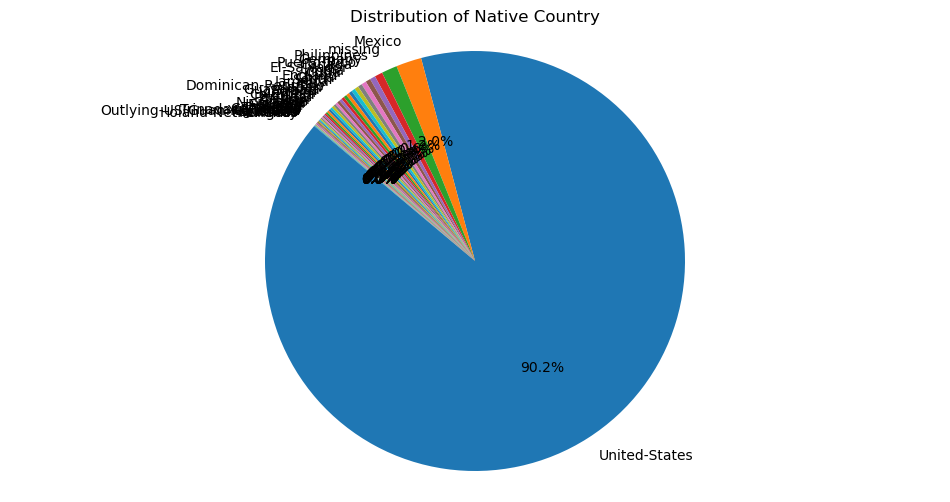

In [372]:
#plotting the pie chart of native-country column
plt.figure(figsize=(12, 6))
plt.pie(df['native-country'].value_counts(), labels=df['native-country'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Native Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

## We can see that in the 'native-country' column 'United-States' occupies most of the values, hence we will drop the 'native-country' column as it does not contribute to our clustering.

In [373]:
#dropping the 'native-country' column from the dataframe
df.drop(columns=['native-country'], inplace=True)
#updating 'categorical_columns' list after dropping the 'native-country' column
categorical_columns.remove('native-country')
#checking the dataframe after dropping the 'native-country' column
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


## To work with categorical data we need to encode it as a number using one-hot encoding or label-encoding

### within each column the data is not ordinal, thus we will use one-hot encoding.

In [374]:
# using 'categorical_columns' to get dummy variables for the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Display the first few rows of the encoded DataFrame
df_encoded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_missing,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_missing,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
0,39,13,2174,0,40,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
1,50,13,0,0,13,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,38,9,0,0,40,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
3,53,7,0,0,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,28,13,0,0,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False


### Before analyzing multivariate distributions --> lets plot the numerical values

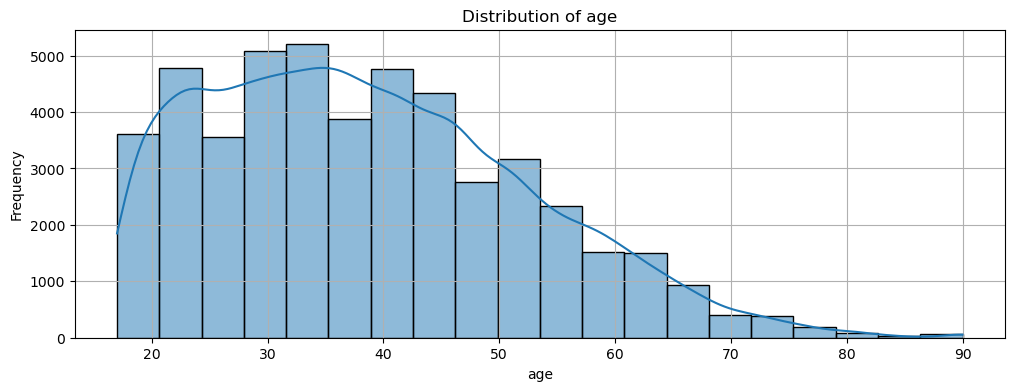

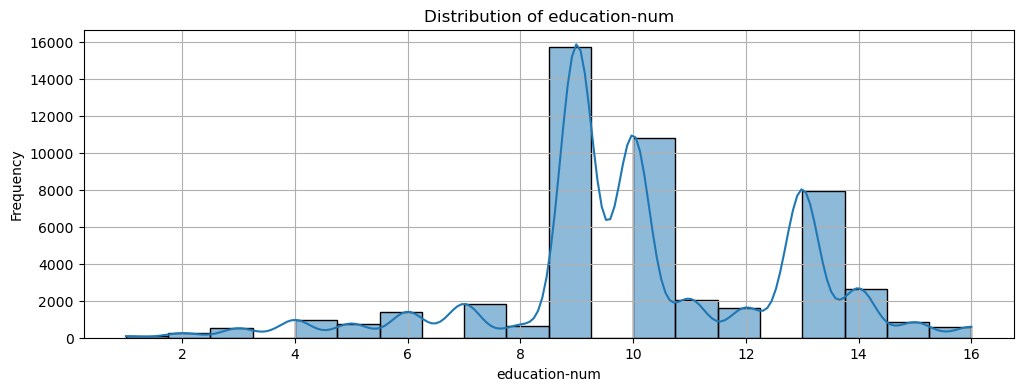

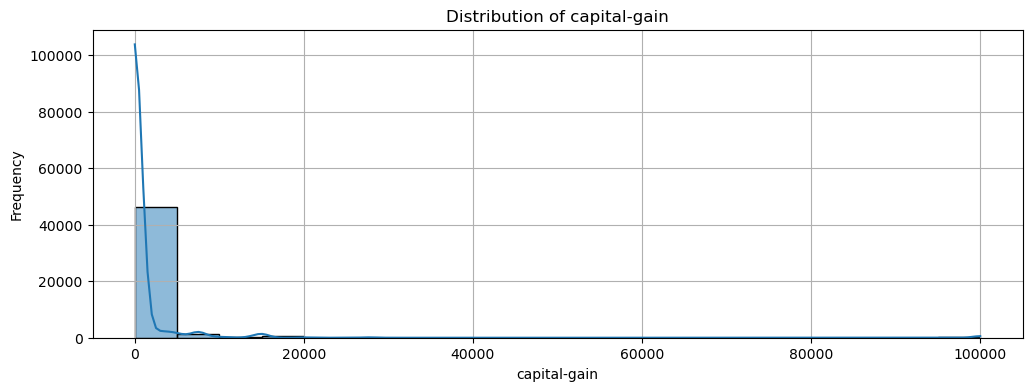

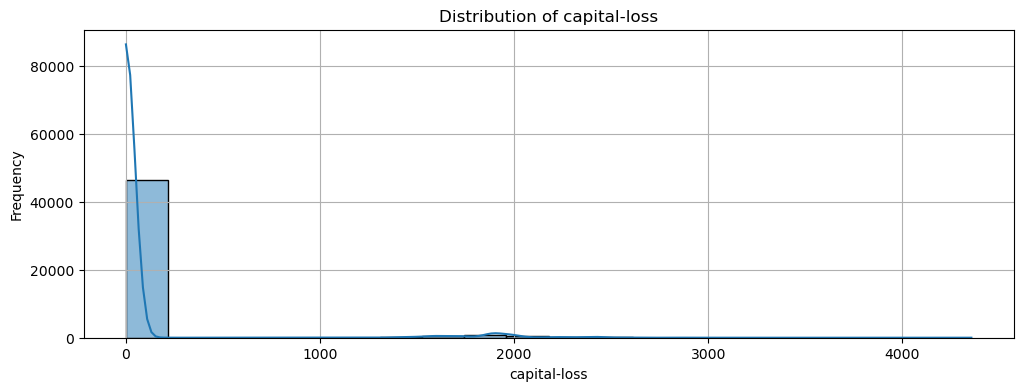

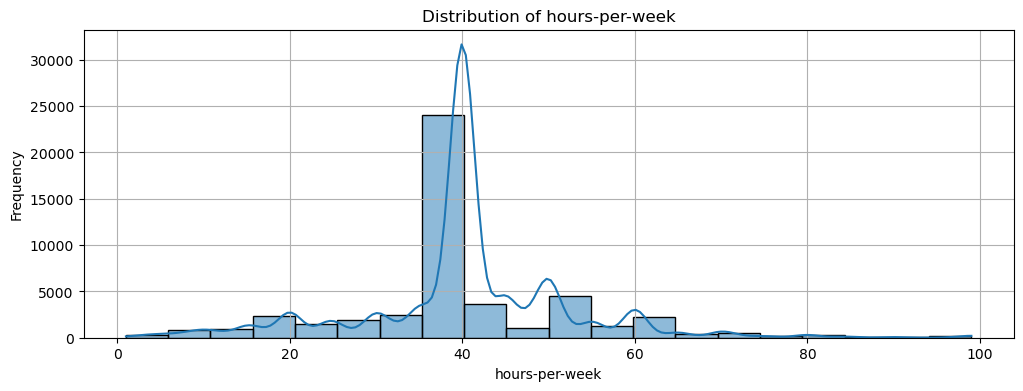

In [375]:
#plotting the numerical columns to see the distribution of values
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.histplot(df_encoded[column], kde=True, bins=20,)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Lets calculate the number of outliers using the IQR method and see whether we should drop the outliers

In [376]:
#lets write a function to calculate the IQR and print the number of outliers
def calculate_iqr_outliers(df, numeric_columns):
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Create a mask for outliers
    outlier_mask = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)
    return outlier_mask

In [377]:
#removing the outliers using the IQR method
print("IQR outliers:\n", calculate_iqr_outliers(df_encoded, numeric_columns).sum())
#print the percentage of outliers
outlier_percentage = (calculate_iqr_outliers(df_encoded, numeric_columns).sum()/ len(df_encoded)) * 100
print("Percentage of outliers in numeric columns:")
print(outlier_percentage.round(2), "%")

IQR outliers:
 age                 214
education-num      1783
capital-gain       4015
capital-loss       2275
hours-per-week    13425
dtype: int64
Percentage of outliers in numeric columns:
age                0.44
education-num      3.67
capital-gain       8.27
capital-loss       4.68
hours-per-week    27.64
dtype: float64 %


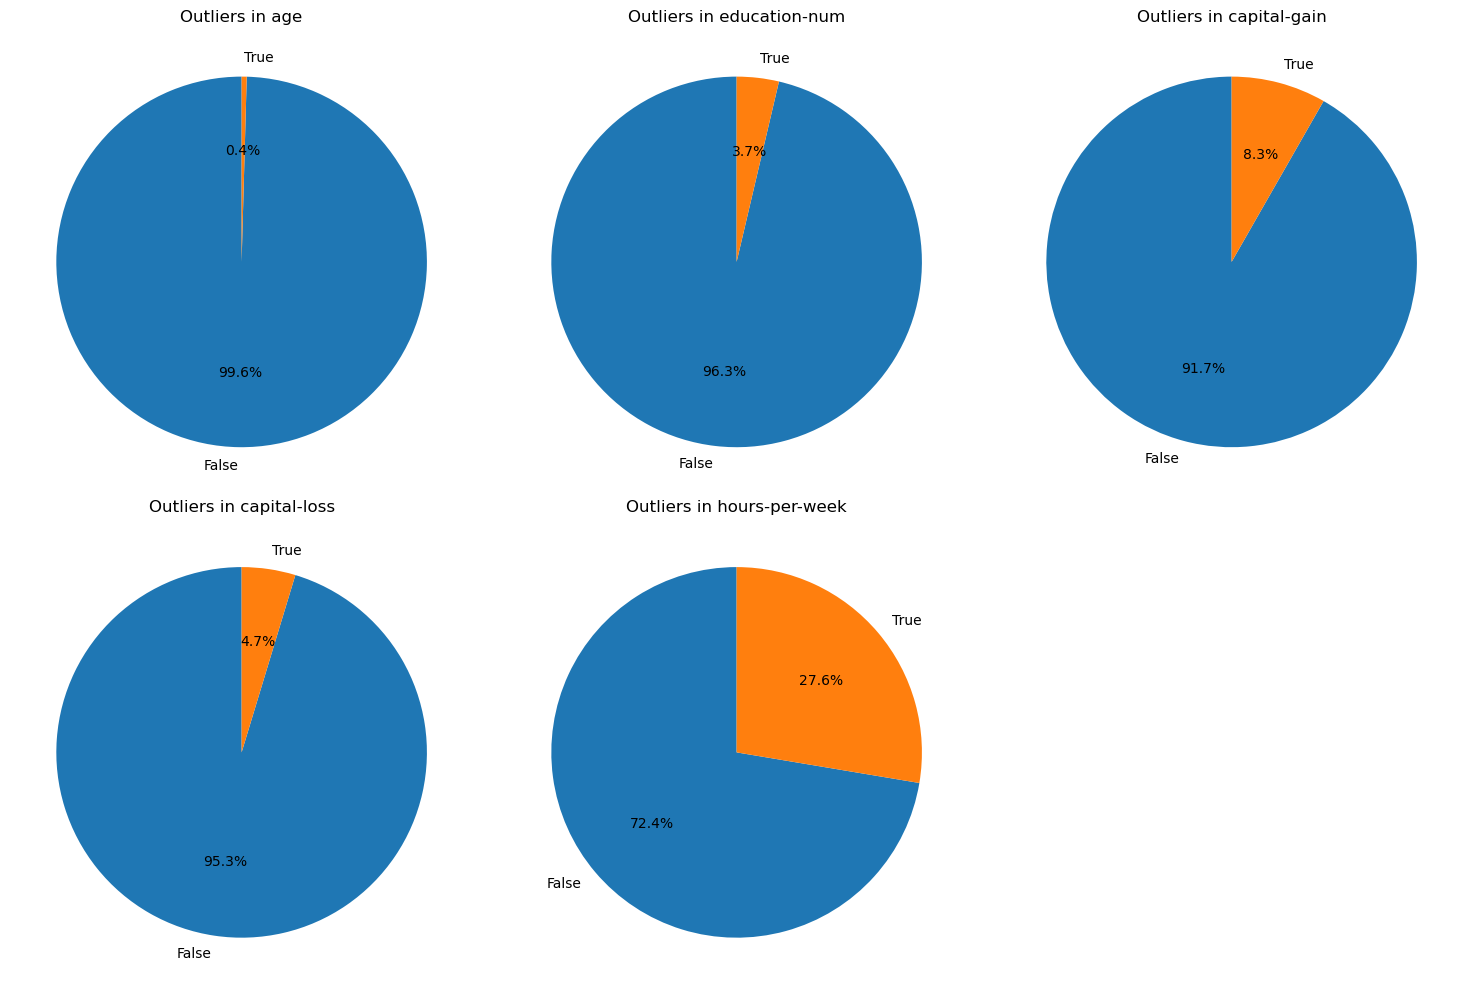

In [378]:
# plotting pie chart for every numeric column to see the distribution of outliers in a subplot
plt.figure(figsize=(15, 10))    
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    outlier_counts = calculate_iqr_outliers(df_encoded, numeric_columns)[column].value_counts()
    plt.pie(outlier_counts, labels=outlier_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Outliers in {column}')
plt.tight_layout()
plt.show()


#### we can see the there are a lot of outliers in the 'hours-per-week' column ~ 27%
removing those columns would change the data, maybe we can replace those values with the median value ?


we can see the close to a half of the values in 'hours-per-week' is very densely close to the median, maybe that can explain why there are so many outliers.
_______________________________________________________________________________________________________________________________________


## we will drop all the outliers thats  less than 5 %
## we will use log transform to normalize the outliers that less than 10%
## we will explore the 27% outliers in 'hours-per-week' column 

Number of outliers after removal:
 age                  25
education-num         0
capital-gain       3888
capital-loss       2211
hours-per-week    12802
dtype: int64 rows


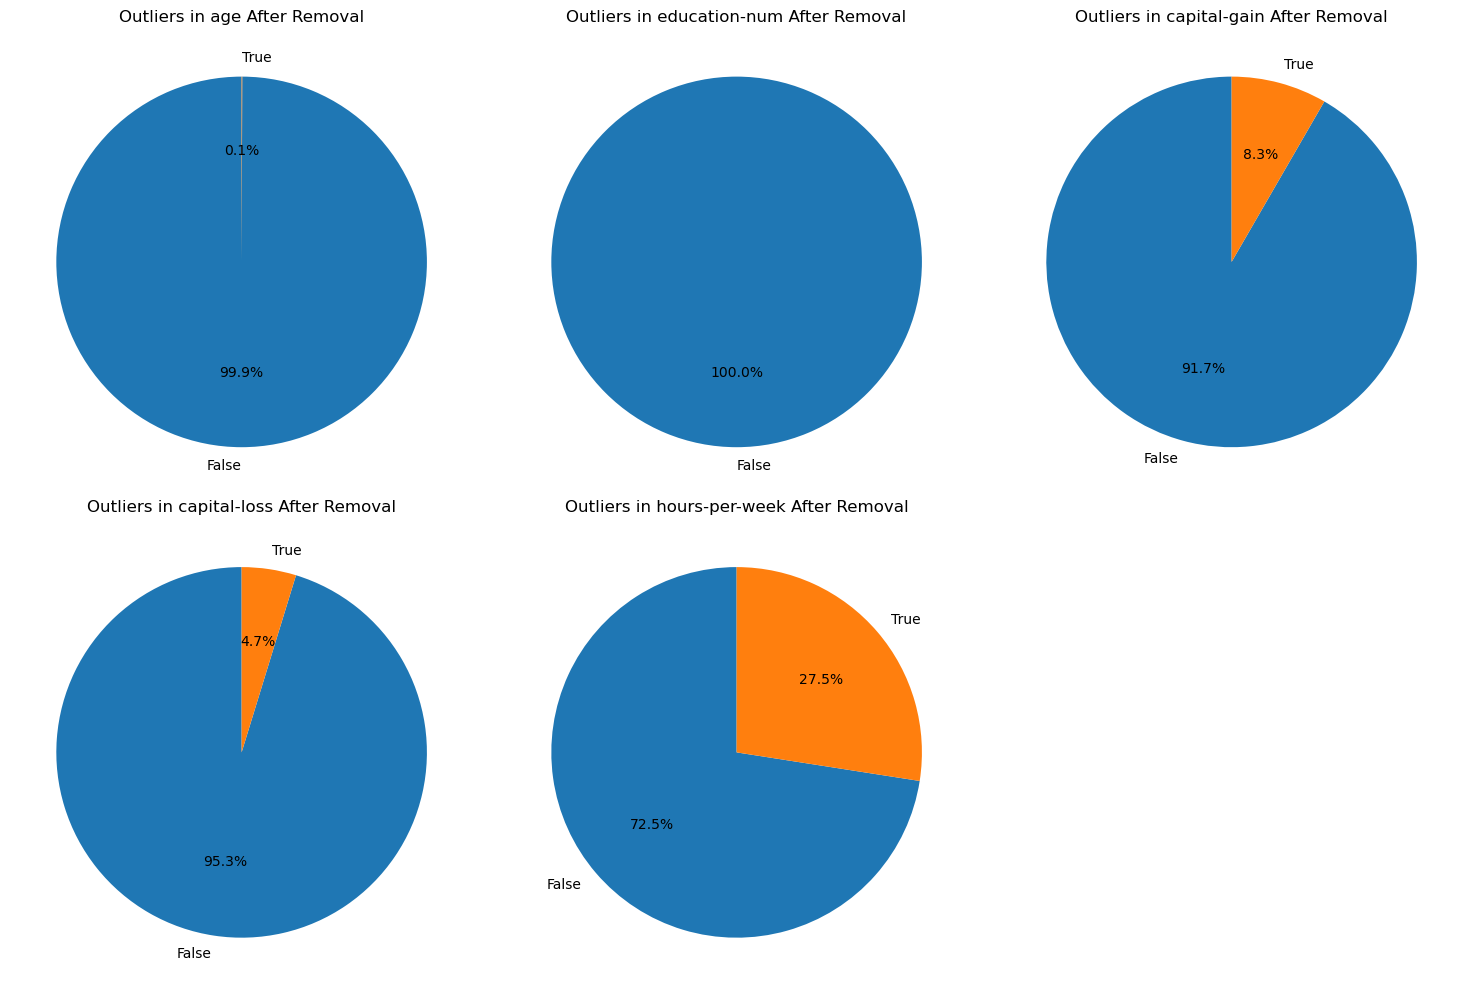

In [379]:
outlier_mask = calculate_iqr_outliers(df_encoded, numeric_columns)
#removing the outliers from 'age' ,'educatio-num' columns in the df_encoded DataFrame
df_encoded = df_encoded[~outlier_mask['age'] & ~outlier_mask['education-num']]
#checking the outliers again
outlier_mask = calculate_iqr_outliers(df_encoded, numeric_columns)
# Display the number of outliers after removal
print("Number of outliers after removal:\n", outlier_mask.sum(), "rows")
#plotting the pie chart for the outliers after removal
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    outlier_counts = calculate_iqr_outliers(df_encoded, numeric_columns)[column].value_counts()
    plt.pie(outlier_counts, labels=outlier_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Outliers in {column} After Removal')
plt.tight_layout()
plt.show()


Number of outliers after transformation:
 age                  25
education-num         0
capital-gain       3888
capital-loss       2211
hours-per-week    12802
dtype: int64 rows


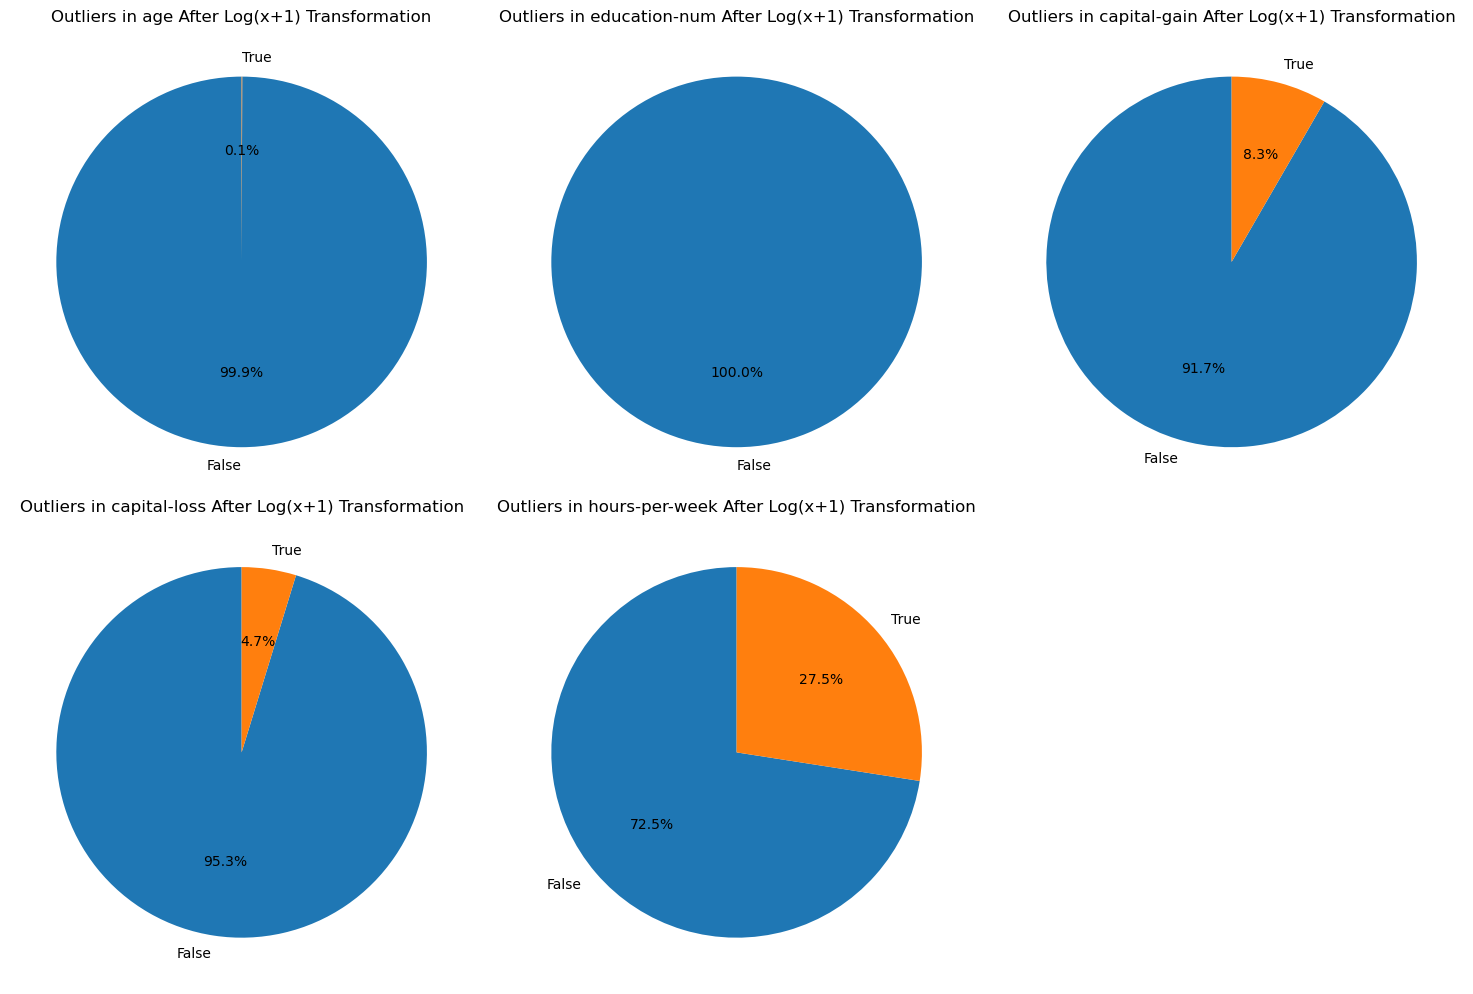

In [380]:
#log(1+x) transformation for the 'capital-gain' and 'capital-loss' columns
df_encoded['capital-gain'] = np.log1p(df_encoded['capital-gain'])
df_encoded['capital-loss'] = np.log1p(df_encoded['capital-loss'])
# Recalculate the IQR for the remaining numeric columns
outlier_mask = calculate_iqr_outliers(df_encoded, numeric_columns)
# Display the number of outliers after transformation
print("Number of outliers after transformation:\n", outlier_mask.sum(), "rows")
#plotting the pie chart for the outliers after transformation
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    outlier_counts = calculate_iqr_outliers(df_encoded, numeric_columns)[column].value_counts()
    plt.pie(outlier_counts, labels=outlier_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Outliers in {column} After Log(x+1) Transformation')
plt.tight_layout()
plt.show()



### The log(1+x) transformation didnt do much...
### we will proceed to another method : Winsorization at the 5th/95th percentiles

Number of outliers after Winsorizing:
 age                  25
education-num         0
capital-gain       3888
capital-loss          0
hours-per-week    12802
dtype: int64


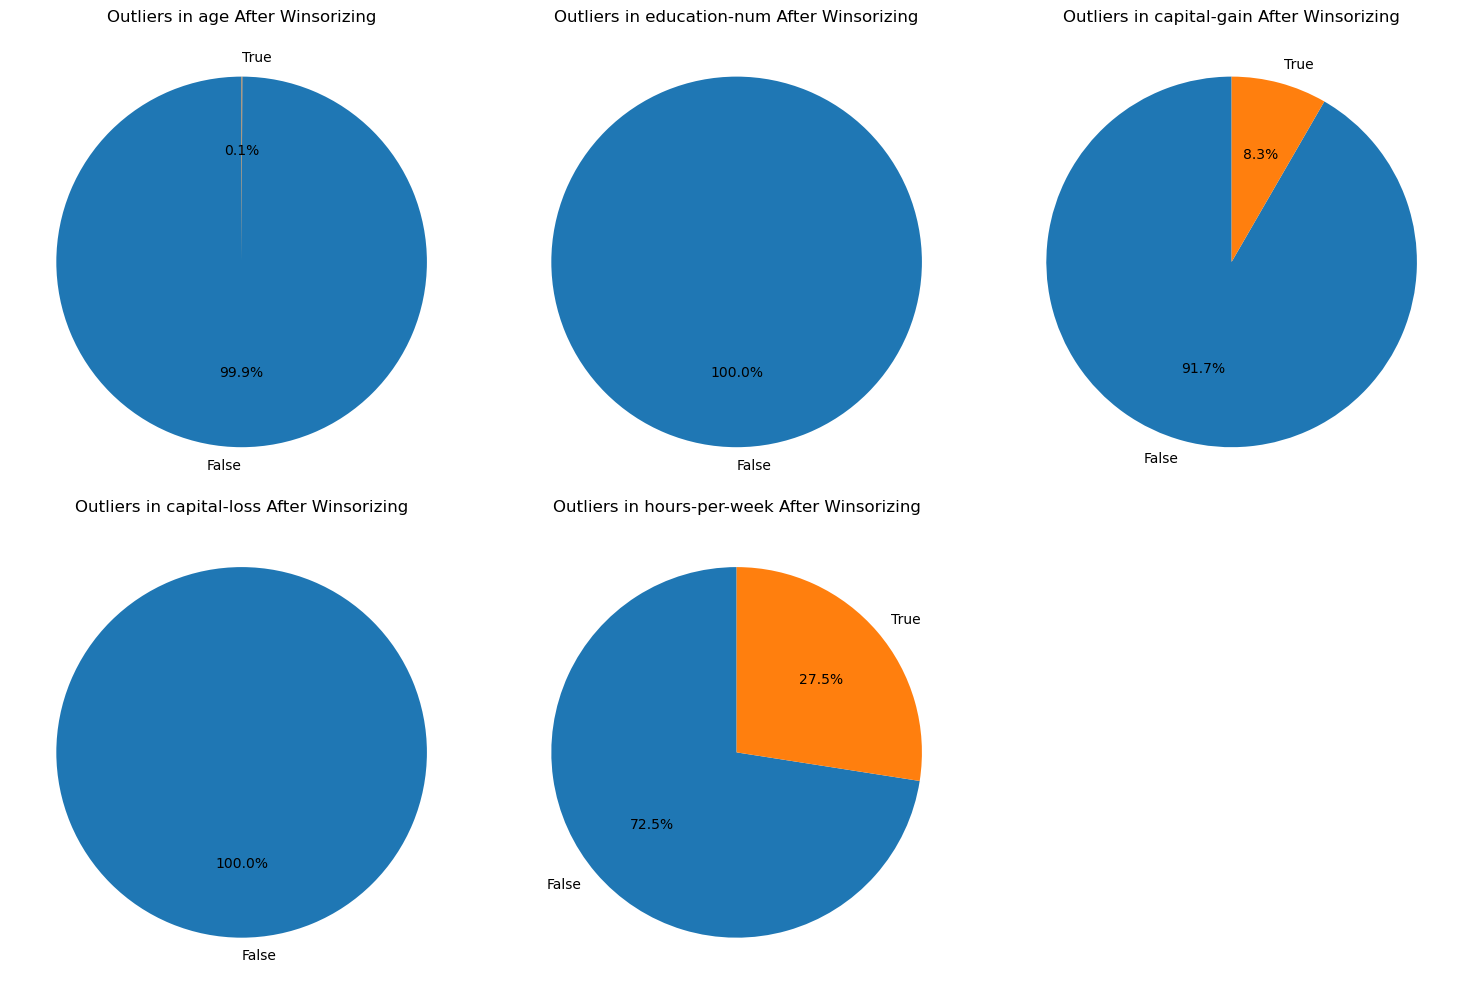

In [381]:
# gain thresholds
low_gain, high_gain = df_encoded['capital-gain'].quantile([0.05, 0.95])
# loss thresholds
low_loss, high_loss = df_encoded['capital-loss'].quantile([0.05, 0.95])
# apply clipping
df_encoded['capital-gain'] = df_encoded['capital-gain'].clip(lower=low_gain, upper=high_gain)
df_encoded['capital-loss'] = df_encoded['capital-loss'].clip(lower=low_loss, upper=high_loss)

#checking the outliers after Winsorizing
print("Number of outliers after Winsorizing:\n", calculate_iqr_outliers(df_encoded,numeric_columns).sum())
#plotting the pie chart for the outliers after Winsorizing
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    outlier_counts = calculate_iqr_outliers(df_encoded, numeric_columns)[column].value_counts()
    plt.pie(outlier_counts, labels=outlier_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Outliers in {column} After Winsorizing')
plt.tight_layout()
plt.show()

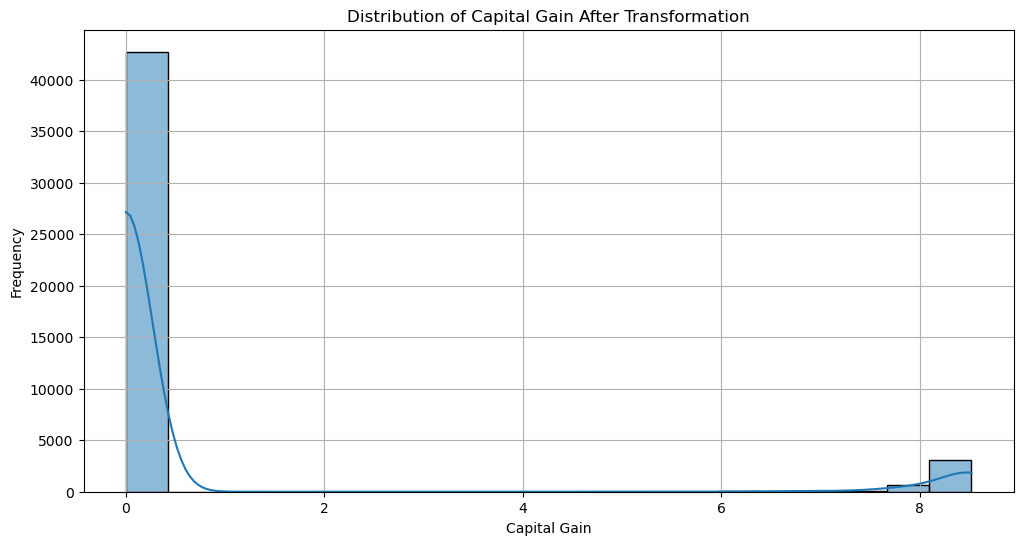

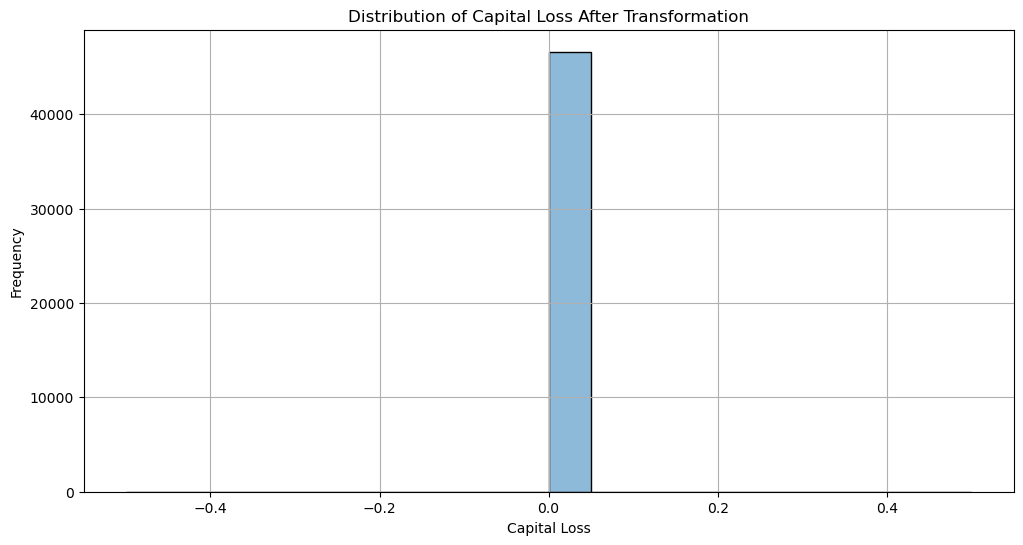

In [382]:
#plotting the distribution of 'capital-gain' and 'capital-loss' columns after Winsorizing
plt.figure(figsize=(12, 6))
sns.histplot(df_encoded['capital-gain'], kde=True, bins=20)
plt.title('Distribution of Capital Gain After Transformation')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
sns.histplot(df_encoded['capital-loss'], kde=True, bins=20)
plt.title('Distribution of Capital Loss After Transformation')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## We can see that in the 'capital-gain' and 'capital-loss' columns nearly all the values are at zero, hence we will drop the these columns as they don't contribute to our clustering.

In [383]:
# dropping the 'capital-gain' and 'capital-loss' columns
df_encoded.drop(columns=['capital-gain', 'capital-loss'], inplace=True)  
#updating the numeric_columns list after dropping the 'capital-gain' and 'capital-loss' columns
numeric_columns.remove('capital-gain')
numeric_columns.remove('capital-loss')
#checking the dataframe after dropping the 'capital-gain' and 'capital-loss' columns
df_encoded.head()

,age,education-num,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_missing,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_missing,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
0,39,13,40,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
1,50,13,13,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,38,9,40,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
3,53,7,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,28,13,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False


# Plots !

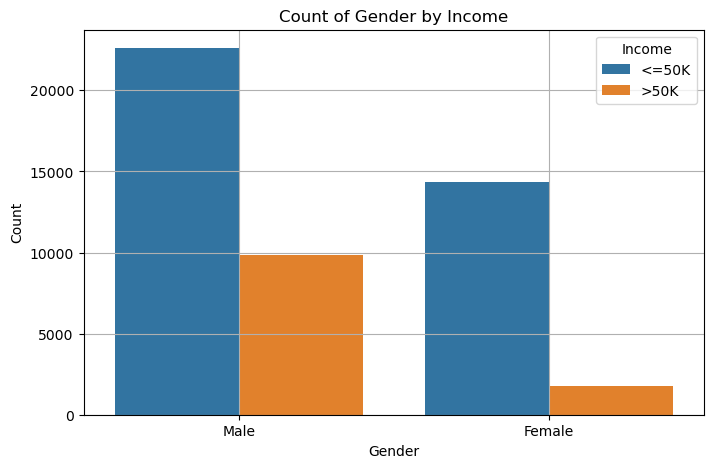

In [384]:
# we want to see the distribution on 'sex' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Count of Gender by Income')
plt.xlabel('Gender')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()

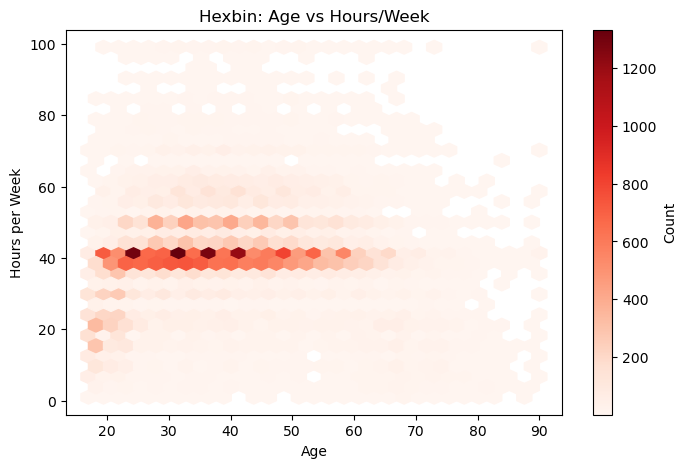

In [385]:
plt.figure(figsize=(8,5))
hb = plt.hexbin(df['age'], df['hours-per-week'],
                gridsize=30,       # adjust resolution
                cmap='Reds',
                mincnt=1)          # hide empty bins
cb = plt.colorbar(hb)
cb.set_label('Count')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Hexbin: Age vs Hours/Week')
plt.show()

In [386]:
df_encoded.head(10)

,age,education-num,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_missing,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_missing,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
0,39,13,40,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
1,50,13,13,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,38,9,40,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
3,53,7,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,28,13,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
5,37,14,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
6,49,5,16,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
7,52,9,45,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
8,31,14,50,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True
9,42,13,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


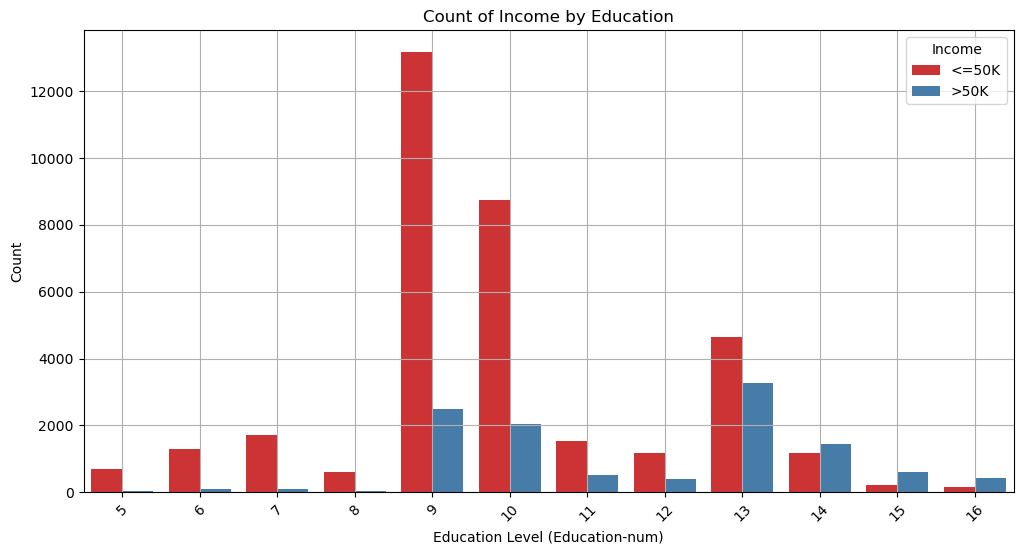

{'Preschool': 1,
 '1st-4th': 2,
 '5th-6th': 3,
 '7th-8th': 4,
 '9th': 5,
 '10th': 6,
 '11th': 7,
 '12th': 8,
 'HS-grad': 9,
 'Some-college': 10,
 'Assoc-voc': 11,
 'Assoc-acdm': 12,
 'Bachelors': 13,
 'Masters': 14,
 'Prof-school': 15,
 'Doctorate': 16}

In [387]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_encoded,
    x='education-num',
    hue='income_>50K',   # still using the boolean column
    palette='Set1'
)

plt.title('Count of Income by Education')
plt.xlabel('Education Level (Education-num)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# 2.1. Grab the existing legend handles & labels
handles, labels = ax.get_legend_handles_labels()
#    labels is ['False', 'True'] by default

# 2.2. Re-assign them to what you want
new_labels = ['<=50K', '>50K']
ax.legend(handles, new_labels, title='Income', loc='upper right')

plt.show()

education_dict

/var/folders/w_/k0tpmcyd4kb_g7x40mz6mbjw0000gn/T/ipykernel_11256/1395123667.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




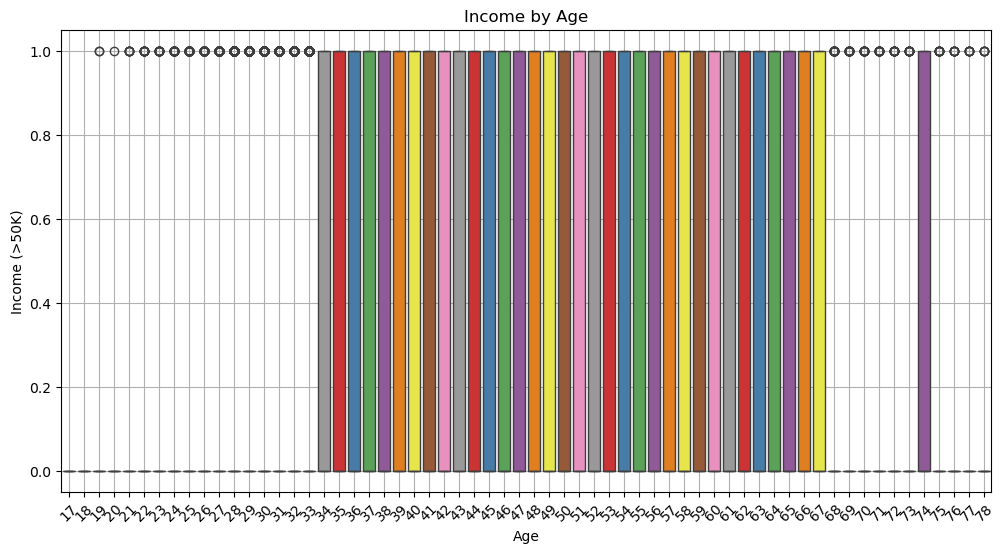

In [388]:
#plotting income by age using plotly
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=df_encoded, x='age', y='income_>50K', palette='Set1')
plt.title('Income by Age')
plt.xlabel('Age')
plt.ylabel('Income (>50K)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [389]:

fig = px.box(
    df_encoded,  
    x='age',
    y='income_>50K',
    title='Income by Age',
    labels={'income_>50K': 'Income (>50K)'}
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Income (>50K)',
    xaxis_tickangle=45,
    plot_bgcolor='white',
    #adding  lines in age
    yaxis=dict(showgrid=True, gridcolor='LightGray', zeroline=True, zerolinecolor='Black')
)

fig.show()

### we want to bin the numeric columns, starting with 'age' : for example : 

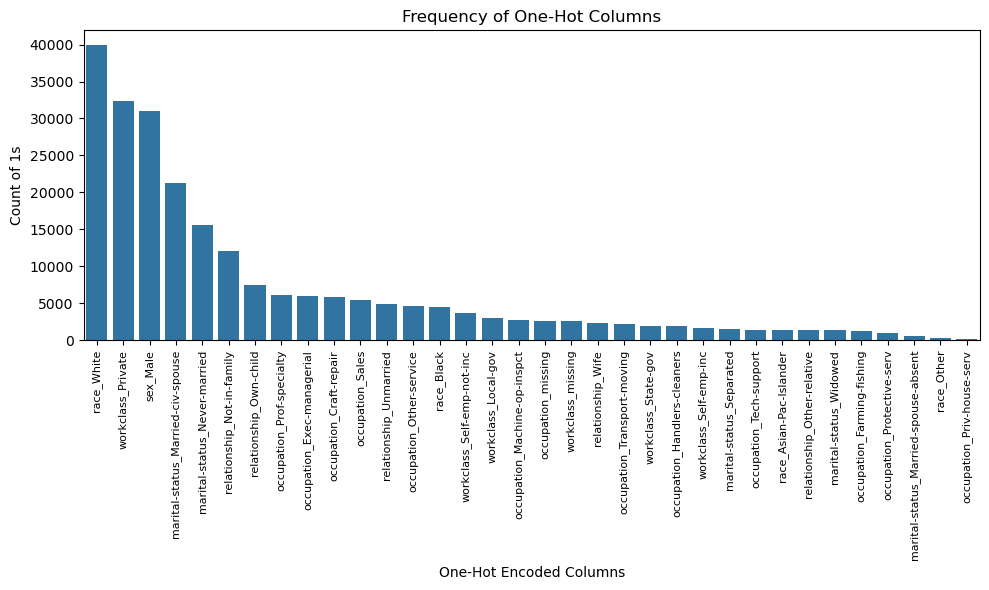

In [392]:
# 2.1. Identify all dummy columns (those with underscores/prefixes)
dummy_cols = [c for c in df_encoded.columns if '_' in c and c not in ['income_>50K']] 

# 2.2. Sum each dummy to see how many rows have that category
counts = df_encoded[dummy_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Count of 1s')
plt.xlabel('One-Hot Encoded Columns')
plt.title('Frequency of One‐Hot Columns')
plt.tight_layout()
plt.show()

[]


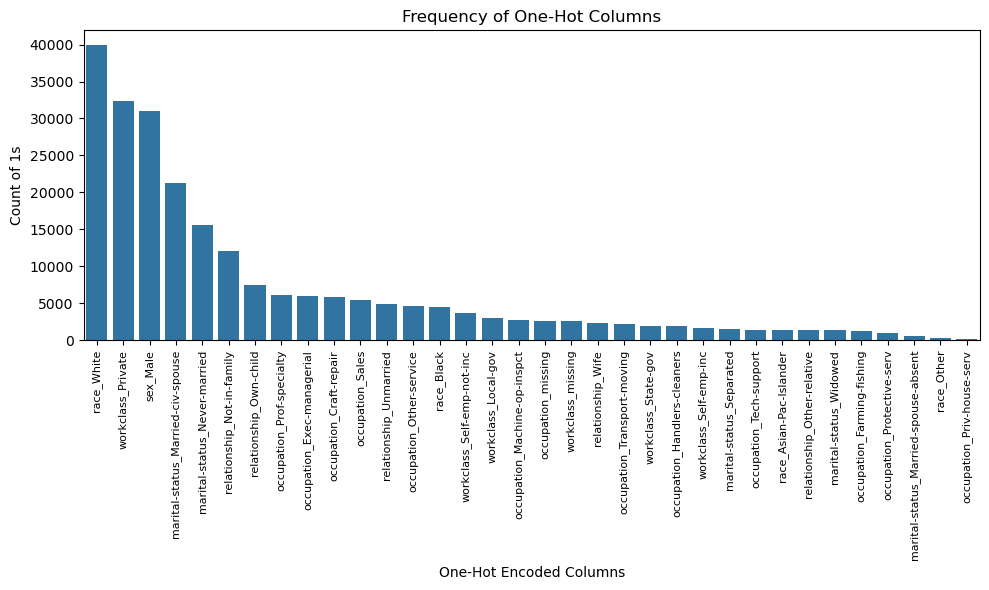

In [393]:
#dropping the columns the have zero 1's
zero_one_hot_columns = counts[counts < 100].index.tolist()
print(zero_one_hot_columns)
#dropping the columns that have <100 1's
df_encoded.drop(columns=zero_one_hot_columns, inplace=True)
#updating the dummy_cols list after dropping the columns that have <100 1's
dummy_cols = [c for c in df_encoded.columns if '_' in c and c not in ['income_>50K']]
#checking the dataframe after dropping the columns that have <100 1's
counts = df_encoded[dummy_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Count of 1s')
plt.xlabel('One-Hot Encoded Columns')
plt.title('Frequency of One‐Hot Columns')
plt.tight_layout()
plt.show()

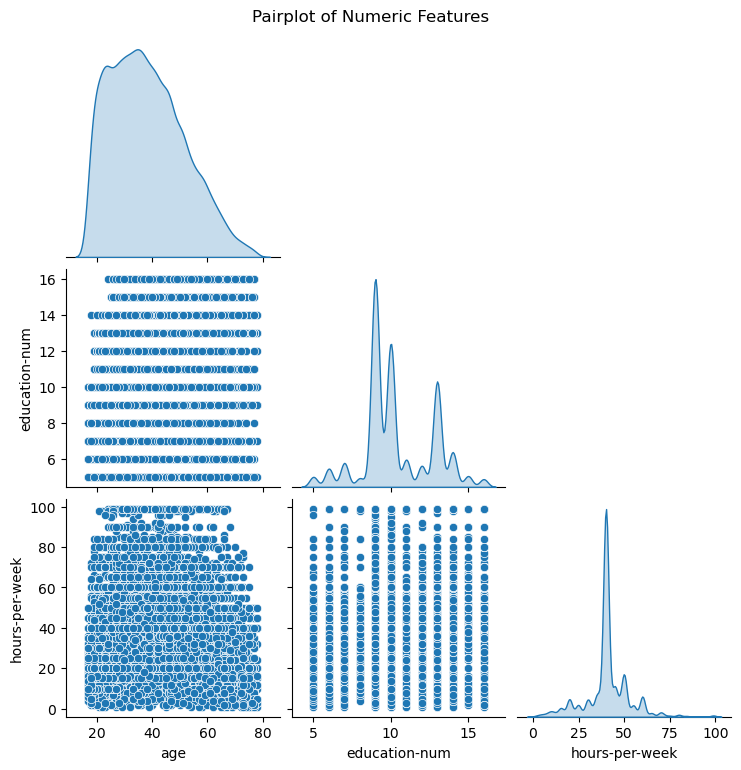

In [395]:
sns.pairplot(df_encoded[numeric_columns], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

Explained variance ratio (PC1, PC2): [0.25292097 0.1721699 ]


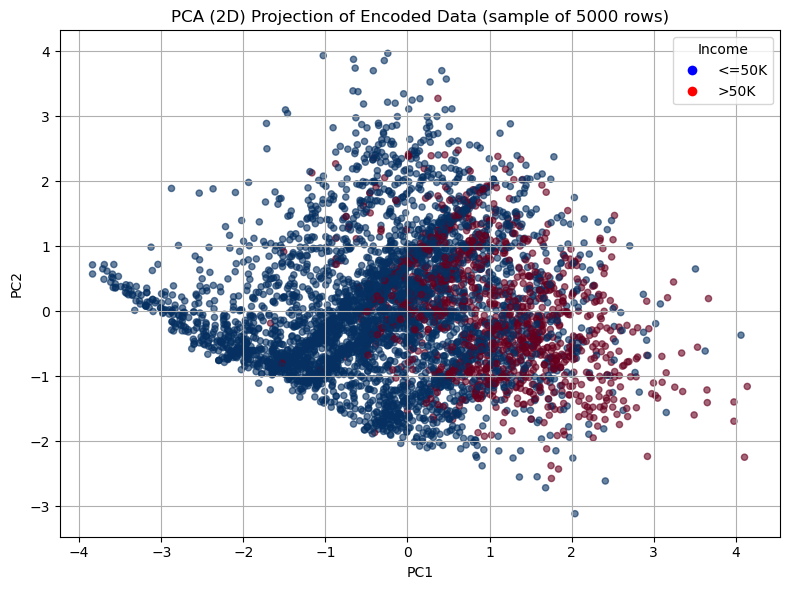

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Extract and scale the numeric columns:
numeric_cols = ['age', 'education-num', 'hours-per-week']
scaler = StandardScaler()
df_num = df_encoded[numeric_cols]
df_num_scaled = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=numeric_cols,
    index=df_encoded.index
)

# 2. Identify one‐hot/dummy columns (everything except our three numerics and the income flag)
dummy_cols = [c for c in df_encoded.columns 
              if c not in numeric_cols + ['income_>50K']]

# 2a. Drop any dummy whose “1”s are in fewer than 1% of the rows:
freq = df_encoded[dummy_cols].sum(axis=0) / len(df_encoded)
keep_dummies = freq[freq > 0.01].index.tolist()

# 3. Build the final feature matrix (scaled numerics + kept dummies):
X = pd.concat([
    df_num_scaled,
    df_encoded[keep_dummies]
], axis=1)

# 4. Run PCA → 2D projection (we’ll sample up to 5,000 rows if your DF is large):
sample_size = min(5000, len(X))
X_sample = X.sample(sample_size, random_state=42)

pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X_sample)

print(f"Explained variance ratio (PC1, PC2): {pca.explained_variance_ratio_[:2]}")

# 5. Scatter‐plot the 2D PCA result, coloring by income (>50K vs <=50K):
#    We’ll pull the corresponding income labels from df_encoded:
income_labels = df_encoded.loc[X_sample.index, 'income_>50K']

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    proj[:, 0], proj[:, 1],
    c=income_labels.map({False: 0, True: 1}),   # map False→0, True→1
    cmap='RdBu_r',                              # red=high income, blue=low income
    alpha=0.6,
    s=20
)
plt.title('PCA (2D) Projection of Encoded Data (sample of {} rows)'.format(sample_size))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Create a custom legend showing which color means ">50K" vs "<=50K":
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',  label='<=50K', markersize=8),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red',   label='>50K',  markersize=8),
]
plt.legend(handles=legend_elements, title='Income', loc='best')

plt.tight_layout()
plt.show()